In [ ]:
import pandas as pd
from sklearn import preprocessing
import numpy as np
from sklearn.metrics import accuracy_score
import numpy as np
import pandas as pd
from sklearn.ensemble import RandomForestClassifier
from sklearn.model_selection import train_test_split
from sklearn.pipeline import make_pipeline, make_union
from tpot.builtins import StackingEstimator

In [ ]:
data = pd.read_csv('../input/training_set _processed.csv',header=0)
data.head()

In [ ]:
data.columns

In [ ]:
X_train = data[['amount','sc_ic_same','shopper_country', 'issuer_country','time_diff_usage',
              'card_person_used_before','is_cc', 'fraud']]

In [ ]:
X_train.head()

In [ ]:
X_train_ohe = pd.get_dummies(X_train, columns=['shopper_country','issuer_country'])

In [ ]:
X_train_ohe.head()

In [57]:
#!pip install tpot
#!pip install xgboost

  Using cached xgboost-0.6a2.tar.gz


No files/directories in C:\Users\C34618~1.LAU\AppData\Local\Temp\pip-build-r6kbsni5\xgboost\pip-egg-info (from PKG-INFO)


In [58]:
from tpot import TPOTClassifier
from sklearn.datasets import load_iris
from sklearn.model_selection import train_test_split
import numpy as np
X = X_train_ohe.loc[:, X_train_ohe.columns != 'fraud']
y = X_train_ohe['fraud']
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=10)

In [59]:
tpot = TPOTClassifier(generations=10, population_size=50, verbosity=2,scoring='accuracy')
tpot.fit(X_train, y_train)
print(tpot.score(X_test, y_test))
tpot.export('adyen_fraud.py')

Generation 1 - Current best internal CV score: 0.85


Generation 2 - Current best internal CV score: 0.85


Generation 3 - Current best internal CV score: 0.85


Generation 4 - Current best internal CV score: 0.85


Generation 5 - Current best internal CV score: 0.85


Generation 6 - Current best internal CV score: 0.85


Generation 7 - Current best internal CV score: 0.875


Generation 8 - Current best internal CV score: 0.875


Generation 9 - Current best internal CV score: 0.875


Generation 10 - Current best internal CV score: 0.875



Best pipeline: RandomForestClassifier(RandomForestClassifier(input_matrix, bootstrap=True, criterion=entropy, max_features=0.15, min_samples_leaf=10, min_samples_split=20, n_estimators=100), bootstrap=True, criterion=entropy, max_features=0.05, min_samples_leaf=1, min_samples_split=12, n_estimators=100)
0.9


True

In [62]:


exported_pipeline = make_pipeline(
    StackingEstimator(estimator=RandomForestClassifier(bootstrap=True, criterion="entropy", max_features=0.15000000000000002, min_samples_leaf=10, min_samples_split=20, n_estimators=100)),
    RandomForestClassifier(bootstrap=True, criterion="entropy", max_features=0.05, min_samples_leaf=1, min_samples_split=12, n_estimators=100)
)

exported_pipeline.fit(X,y)
results = exported_pipeline.predict(X)

In [63]:

accuracy_score(y,results)

0.88

In [65]:
import numpy as np
from sklearn.metrics import roc_auc_score
roc_auc_score(y,results)

0.8125

In [66]:
from sklearn.metrics import average_precision_score
average_precision_score(y,results) 

0.745

In [69]:
import numpy as np
from scipy import interp
import matplotlib.pyplot as plt
from itertools import cycle

from sklearn import svm, datasets
from sklearn.metrics import roc_curve, auc
from sklearn.model_selection import StratifiedKFold
%matplotlib inline

In [73]:
false_positive_rate, true_positive_rate, thresholds = roc_curve(y, results)
roc_auc = auc(false_positive_rate, true_positive_rate)

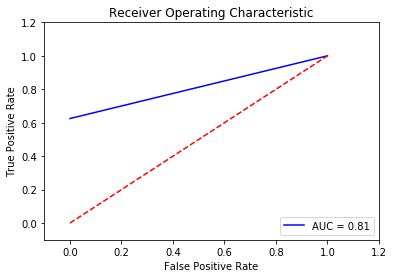

In [74]:
plt.title('Receiver Operating Characteristic')
plt.plot(false_positive_rate, true_positive_rate, 'b',
label='AUC = %0.2f'% roc_auc)
plt.legend(loc='lower right')
plt.plot([0,1],[0,1],'r--')
plt.xlim([-0.1,1.2])
plt.ylim([-0.1,1.2])
plt.ylabel('True Positive Rate')
plt.xlabel('False Positive Rate')
plt.show()